<a href="https://colab.research.google.com/github/akshat3196/final_project_2020Sp/blob/master/Final_Project_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project IS 590_PR_Spring

### *Data Source and Copyrights*

Source: UCI Machine Learning Repository

Link: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Copyrights: Data was donated to the UCI repository on 17-10-2016 and can be used for academic purposes.

### *Data Description*
Database contains records for 1885 respondents. Each respondent contains some attributes like level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs like alcohol cannabis, chocolate, cocaine, caffeine, LSD etc. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

## Hypothesis Testing
1. The average age of people drinking alcohol is less in the United Kingdom than in the United States.

2. Do people using Cannabis result in using hard drugs like Cocaine, LSD, Ecstasy. Can we conclude in general that Cannabis a gateway drug to other drugs?

3.  Do men consume more nicotine than women?

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
 from google.colab import files

In [3]:
uploaded = files.upload()

Saving drug_consumption.data to drug_consumption.data


In [0]:
#importing data file
df_raw = pd.read_csv('drug_consumption.data',header = None)

In [0]:
#Data Dimensionality
df_raw.shape

(1885, 32)

It was mentioned in the data description that the study took responses from 1886 participants, and we can verify that by looking at the shape of dataframe. It has 1885 rows, as expected.

In [0]:
#Checking for null values in the data and observing column data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1885 non-null   int64  
 1   1       1885 non-null   float64
 2   2       1885 non-null   float64
 3   3       1885 non-null   float64
 4   4       1885 non-null   float64
 5   5       1885 non-null   float64
 6   6       1885 non-null   float64
 7   7       1885 non-null   float64
 8   8       1885 non-null   float64
 9   9       1885 non-null   float64
 10  10      1885 non-null   float64
 11  11      1885 non-null   float64
 12  12      1885 non-null   float64
 13  13      1885 non-null   object 
 14  14      1885 non-null   object 
 15  15      1885 non-null   object 
 16  16      1885 non-null   object 
 17  17      1885 non-null   object 
 18  18      1885 non-null   object 
 19  19      1885 non-null   object 
 20  20      1885 non-null   object 
 21  21      1885 non-null   object 
 22  

As we can see the non-null count for every column is same the row count of the dataframe so we can conclude that there is no null values in the data. As a result we need not handle the null values.

In [0]:
#I would be taking x number of columns for my final project
df = df_raw[[1,2,3,4,5,13,17,18,19,20,21,23,26,28,29]]

As proposed on Moodle, I would be using only a subset of attributes provided in the original data. I would be using some attributes of participants of the study, which will be Age, Gender, Education Level, Country,and Ethnicity. I would be taking some of the common drugs which are used like Alcohol, Caffeine, Cannabis, Cocaine etc

In [0]:
#Making an header list as DataFrame has no headers
header_list = ['Age','Gender','Education','Country','Ethnicity','Alcohol','Caffeine','Cannabis','Chocolate','Cocaine','Crack','Heroin','LSD','Mushroom','Nicotine']

In [0]:
#Assigning header names
df.columns = header_list

In [8]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Alcohol',
       'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Heroin',
       'LSD', 'Mushroom', 'Nicotine'],
      dtype='object')

In [0]:
#Taking a look on data types of the columns
df.dtypes

Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Alcohol       object
Caffeine      object
Cannabis      object
Chocolate     object
Cocaine       object
Crack         object
Heroin        object
LSD           object
Mushroom      object
Nicotine      object
dtype: object

In [0]:
df

,Age,Gender,Education,Country,Ethnicity,Alcohol,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Heroin,LSD,Mushroom,Nicotine
0,0.49788,0.48246,-0.05921,0.96082,0.12600,CL5,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL2
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,CL5,CL6,CL4,CL6,CL3,CL0,CL0,CL2,CL0,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,CL6,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL1,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,CL4,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL0,CL2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,CL4,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL2,CL2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,CL5,CL4,CL5,CL4,CL0,CL0,CL0,CL3,CL0,CL0
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,CL5,CL5,CL3,CL4,CL0,CL0,CL0,CL5,CL4,CL5
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,CL4,CL6,CL6,CL6,CL4,CL0,CL0,CL2,CL2,CL6
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,CL5,CL6,CL6,CL5,CL0,CL0,CL0,CL3,CL3,CL4


This is the final dataframe, which I would be working on. But the values of columns in this dataframe doesn't make much sense. This is because we have to replace these values by categories which is mentioned in the data source.

In [0]:

pd.options.mode.chained_assignment = None
df['Age'] = df['Age'].astype(str)
df['Gender'] = df['Gender'].astype(str)
df['Ethnicity'] = df['Ethnicity'].astype(str)
df['Education'] = df['Education'].astype(str)
df['Country'] = df['Country'].astype(str)

We earlier saw the data types of all the columns, here we would convert the columns of float datatype into string datatype

In [0]:
#Defining dictionaries which will be used in replace function
age_dict = {'-0.9519700000000001':'18-24','-0.07854':'25-34','0.49788000000000004':'35-44','1.09449':'45-54','1.82213':'55-64','2.59171':'65+'}
gender_dict = {'0.48246000000000006':'Female','-0.48246000000000006':'Male'}
education_dict = {'-0.059210000000000006':'Professional Certificate/Diploma', '1.98437':'Doctrate Degree', '1.16365':"Master's Degree", '-1.22751':'Left school at 18',
       '-1.7379':'Left school at 16 years', '0.45468000000000003':'University degree', '-0.6111300000000001':'Enrolled in University/College',
       '-2.43591': 'Left school before 16 years', '-1.43719':' Left school at 17 years'}
country_dict = {'0.9608200000000001':'UK', '0.24923':'Canada', '-0.57009':'USA', '-0.28519':'Other',
       '-0.09765':'Australia', '0.21128000000000002':'Republic of Ireland', '-0.46841000000000005':'New Zealand'}
ethnicity_dict = {'0.126':'Mixed-White/Asian', '-0.31685':'White', '0.1144':'Other', '-0.22166':'Mixed-White/Black', '-0.50212':'Asian','-1.1070200000000001':'Black', '1.90725':' Mixed-Black/Asian'}
drug_dict = {'CL0':'Never Used', 'CL2':'Used in Last Decade', 'CL1':'Used over a Decade Ago', 'CL3':'Used in Last Year', 'CL4':'Used in Last Month', 'CL5':'Used in Last Week', 'CL6':'Used in Last Day'}

In [0]:
#Replacing the orignal values of the dataframe by values in the dictionaries
pd.options.mode.chained_assignment = None
df['Age'].replace(age_dict,inplace = True)
df['Gender'].replace( gender_dict,inplace = True)
df['Country'].replace( country_dict,inplace = True)
df['Ethnicity'].replace( ethnicity_dict,inplace = True)
df['Education'].replace( education_dict,inplace = True)
df['Alcohol'].replace( drug_dict,inplace = True)
df['Caffeine'].replace( drug_dict,inplace = True)
df['Cannabis'].replace( drug_dict,inplace = True)
df['Chocolate'].replace( drug_dict,inplace = True)
df['Cocaine'].replace( drug_dict,inplace = True)
df['Crack'].replace( drug_dict,inplace = True)
df['Heroin'].replace( drug_dict,inplace = True)
df['LSD'].replace( drug_dict,inplace = True)
df['Mushroom'].replace( drug_dict,inplace = True)
df['Nicotine'].replace( drug_dict,inplace = True)

In [0]:
df

,Age,Gender,Education,Country,Ethnicity,Alcohol,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Heroin,LSD,Mushroom,Nicotine
0,35-44,Female,Professional Certificate/Diploma,UK,Mixed-White/Asian,Used in Last Week,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade
1,25-34,Male,Doctrate Degree,UK,White,Used in Last Week,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Never Used,Used in Last Decade,Never Used,Used in Last Month
2,35-44,Male,Professional Certificate/Diploma,UK,White,Used in Last Day,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used
3,18-24,Female,Master's Degree,UK,White,Used in Last Month,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade
4,35-44,Female,Doctrate Degree,UK,White,Used in Last Month,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Used in Last Decade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,18-24,Female,Enrolled in University/College,USA,White,Used in Last Week,Used in Last Month,Used in Last Week,Used in Last Month,Never Used,Never Used,Never Used,Used in Last Year,Never Used,Never Used
1881,18-24,Male,Enrolled in University/College,USA,White,Used in Last Week,Used in Last Week,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Used in Last Week,Used in Last Month,Used in Last Week
1882,25-34,Female,University degree,USA,White,Used in Last Month,Used in Last Day,Used in Last Day,Used in Last Day,Used in Last Month,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Used in Last Day
1883,18-24,Female,Enrolled in University/College,USA,White,Used in Last Week,Used in Last Day,Used in Last Day,Used in Last Week,Never Used,Never Used,Never Used,Used in Last Year,Used in Last Year,Used in Last Month


In [0]:
#Defining a function which returns value counts for dataframe column

def value_percentage(column_name):
  return df[column_name].value_counts(normalize = True)


In [0]:
#Defining a function which returns a pie chart value counts for dataframe column

def value_percentage_chart(column_name):
  df[column_name].value_counts(normalize = True).plot.pie(figsize=(8, 8),autopct='%1.1f%%')

In [0]:
value_percentage('Education')

no certificate or degree            0.268435
University degree                   0.254642
Master's Degree                     0.150133
Professional Certificate/Diploma    0.143236
Left school at 18                   0.053050
Left school at 16 years             0.052520
Doctrate Degree                     0.047215
 Left school at 17 years            0.015915
Left school before 16 years         0.014854
Name: Education, dtype: float64

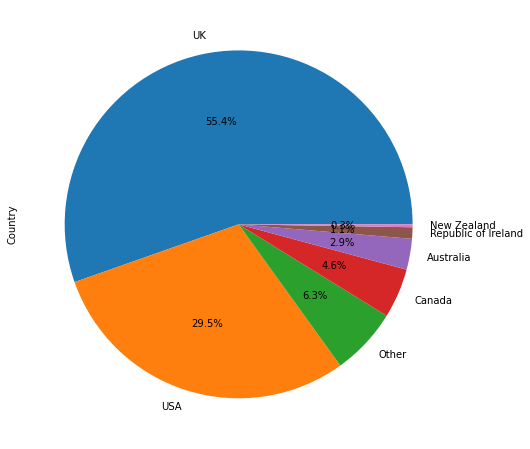

In [0]:
value_percentage_chart('Country')

From this pie chart we can see that more than half of the respondents are form the United Kingdom which makes sense as the data was donated by the Professors working in the University of Nottingham.

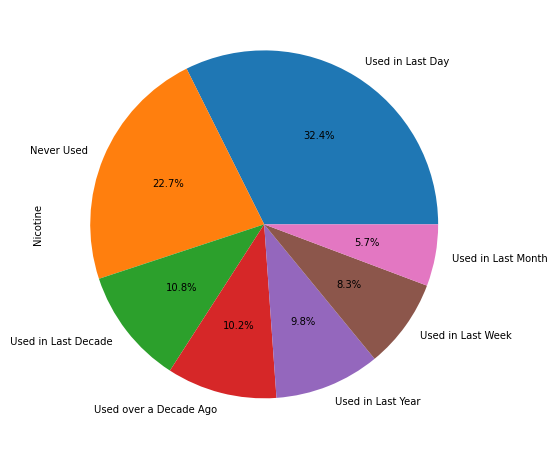

In [0]:
value_percentage_chart('Nicotine')

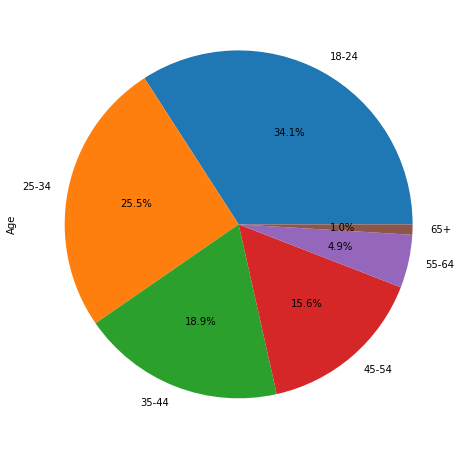

In [0]:
value_percentage_chart('Age')

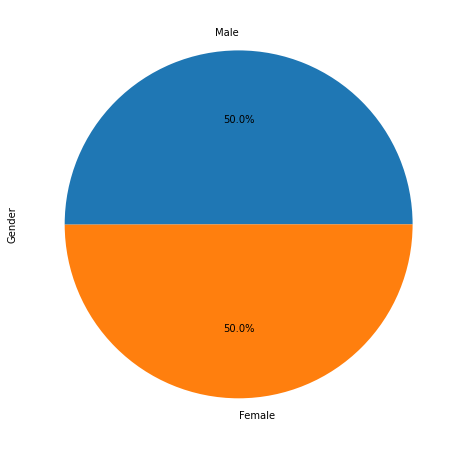

In [0]:
value_percentage_chart('Gender')

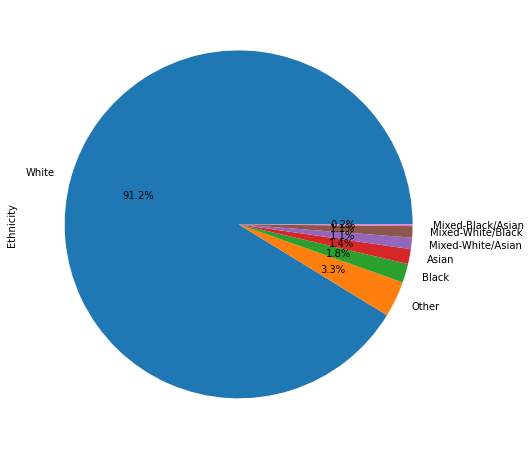

In [0]:
value_percentage_chart('Ethnicity')

In [0]:
def histogram_func(column_name):
  ax = sns.countplot(df[column_name])
  ax.set_xticklabels(
      ax.get_xticklabels(),
      rotation=20,
      horizontalalignment='right'
  )

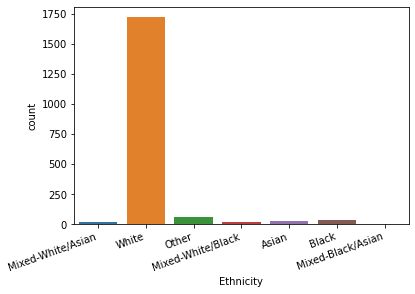

In [0]:
histogram_func('Ethnicity')

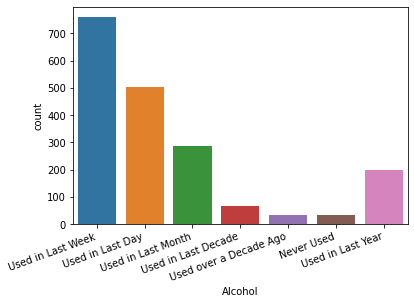

In [0]:
histogram_func('Alcohol')

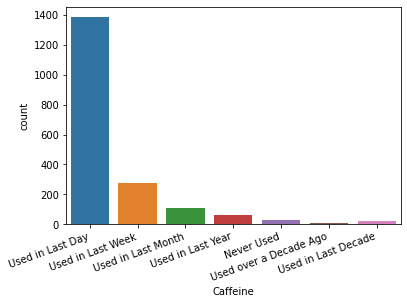

In [0]:
histogram_func('Caffeine')

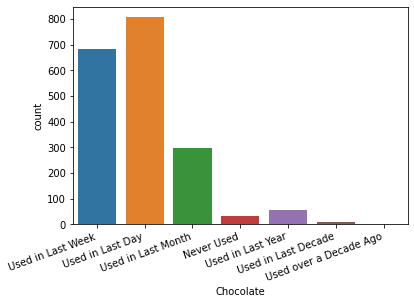

In [0]:
histogram_func('Chocolate')

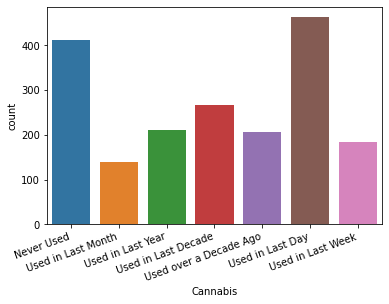

In [0]:
histogram_func('Cannabis')

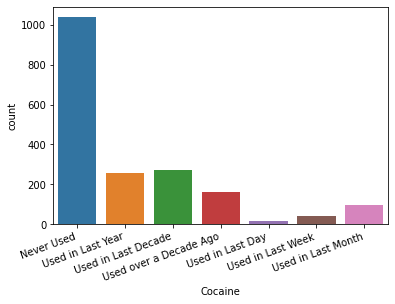

In [0]:
histogram_func('Cocaine')

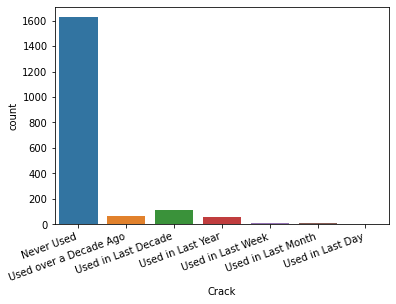

In [0]:
histogram_func('Crack')

From the above histogram we can see that people consume legal drugs such as Alcohol, Caffeine and Chocolate on a more regular basis than they have consumed illegal drugs such as Crack, Cocaine, LSD.

### Hypothesis 2:
Do people using Cannabis result in using hard drugs like Cocaine, LSD, Ecstasy. Can we conclude in general that Cannabis a gateway drug to other drugs?

Let's find out how each attribute in the data is related with other columns. I am finding the Pearson correlation as our data is categorical. 

In [0]:
#Changing the data type of columns to 'category' in order to find the correlation
pd.options.mode.chained_assignment = None
df['Age'] = df['Age'].astype('category').cat.codes
df['Gender1'] = df['Gender'].astype('category').cat.codes
df['Ethnicity1'] = df['Ethnicity'].astype('category').cat.codes
df['Education1'] = df['Education'].astype('category').cat.codes
df['Country1'] = df['Country'].astype('category').cat.codes
df['Alcohol1'] = df['Alcohol'].astype('category').cat.codes
df['Caffeine1'] = df['Caffeine'].astype('category').cat.codes
df['Cannabis1'] = df['Cannabis'].astype('category').cat.codes
df['Chocolate1'] = df['Chocolate'].astype('category').cat.codes
df['Cocaine1'] = df['Cocaine'].astype('category').cat.codes
df['Crack1'] = df['Crack'].astype('category').cat.codes
df['Heroin1'] = df['Heroin'].astype('category').cat.codes
df['LSD1'] = df['LSD'].astype('category').cat.codes
df['Mushroom1'] = df['Mushroom'].astype('category').cat.codes
df['Nicotine1'] = df['Nicotine'].astype('category').cat.codes

In [0]:
correlation = df.corr(method = 'pearson')

In [0]:
correlation

,Age,Gender,Education,Country,Ethnicity,Alcohol,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Heroin,LSD,Mushroom,Nicotine
Age,1.000000,-0.096515,-0.222876,-0.058735,0.043342,-0.037292,-0.135656,0.018551,-0.053589,0.012299,0.050189,0.062532,0.046926,-0.013959,0.047797
Gender,-0.096515,1.000000,0.067293,-0.017922,0.020920,-0.037188,0.002569,0.102190,0.049635,0.115401,0.068850,0.069741,0.150335,0.157578,0.057068
Education,-0.222876,0.067293,1.000000,0.103673,-0.020893,-0.011634,0.025913,0.006598,0.004138,0.039880,-0.013995,-0.022023,0.065730,0.068285,0.017650
Country,-0.058735,-0.017922,0.103673,1.000000,-0.028111,-0.003411,-0.034346,-0.009579,-0.017997,-0.003247,-0.004022,0.029472,-0.005670,0.000970,0.014935
Ethnicity,0.043342,0.020920,-0.020893,-0.028111,1.000000,0.027733,-0.041895,0.091483,0.005414,0.042346,-0.009937,0.004574,0.044823,0.055221,0.073311
Alcohol,-0.037292,-0.037188,-0.011634,-0.003411,0.027733,1.000000,0.044604,0.009120,0.030161,-0.010804,0.030604,0.021247,-0.018786,-0.023683,-0.010492
Caffeine,-0.135656,0.002569,0.025913,-0.034346,-0.041895,0.044604,1.000000,0.019558,0.073866,-0.037226,0.027156,-0.003188,0.009454,-0.011319,0.047306
Cannabis,0.018551,0.102190,0.006598,-0.009579,0.091483,0.009120,0.019558,1.000000,0.044944,0.148947,0.063411,0.066087,0.140739,0.143421,0.180418
Chocolate,-0.053589,0.049635,0.004138,-0.017997,0.005414,0.030161,0.073866,0.044944,1.000000,0.012745,-0.000822,0.030785,0.053269,0.030820,-0.012028
Cocaine,0.012299,0.115401,0.039880,-0.003247,0.042346,-0.010804,-0.037226,0.148947,0.012745,1.000000,0.258889,0.255202,0.290244,0.284173,0.070978


[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Gender'),
 Text(2.5, 0, 'Education'),
 Text(3.5, 0, 'Country'),
 Text(4.5, 0, 'Ethnicity'),
 Text(5.5, 0, 'Alcohol'),
 Text(6.5, 0, 'Caffeine'),
 Text(7.5, 0, 'Cannabis'),
 Text(8.5, 0, 'Chocolate'),
 Text(9.5, 0, 'Cocaine'),
 Text(10.5, 0, 'Crack'),
 Text(11.5, 0, 'Heroin'),
 Text(12.5, 0, 'LSD'),
 Text(13.5, 0, 'Mushroom'),
 Text(14.5, 0, 'Nicotine')]

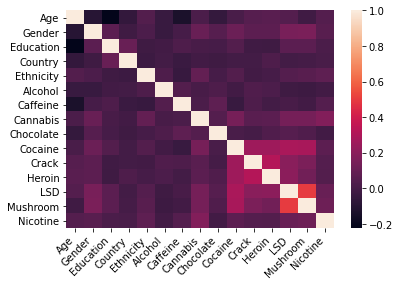

In [0]:

ax = sns.heatmap(
  correlation)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

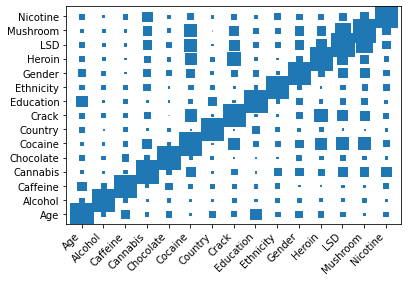

In [0]:
# Code Source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    

corr = df.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs())


Thes size of the boxes represents how much two columns are correlated with each other.We can see that the largest boxes are on a diagnol, which makes sense as the correlation of a attribute with itself would be the highest(1). We can see from the heatmap,that illegal drugs have positive correlated to other illegal drugs. Cannabis is positively correlated with Cocaine, Mushroom and LSD.

Currently working on finding a way which would provide more substansial proof for this hypothesis

## Hypothesis 1
The average age of people drinking alcohol is less in the United Kingdom than in the United States.

We have categorical values instead of continuous values for age as well as consumption of drugs. So I changed the categorical values into ordinal values to perform analysis.

In [0]:
drug_dict_new = {'Never Used':1,'Used over a Decade Ago':2,'Used in Last Decade':3, 'Used in Last Year':4,'Used in Last Month':5,'Used in Last Week':6,'Used in Last Day':7}
age_dict_new={'18-24':1,'25-34':2,'35-44':3,'45-54':4,'55-64':5,'65+':6}

In [0]:
df['Age'].replace(age_dict_new,inplace = True)

In [0]:
df.groupby(['Country','Alcohol'])['Age'].mean()

Country              Alcohol               
Australia            Used in Last Day          2.133333
                     Used in Last Month        2.416667
                     Used in Last Week         1.588235
                     Used in Last Year         2.222222
                     Used over a Decade Ago    4.000000
Canada               Never Used                2.666667
                     Used in Last Day          2.437500
                     Used in Last Decade       3.166667
                     Used in Last Month        2.750000
                     Used in Last Week         2.000000
                     Used in Last Year         2.000000
                     Used over a Decade Ago    4.750000
New Zealand          Used in Last Day          2.000000
                     Used in Last Week         1.000000
                     Used in Last Year         1.500000
Other                Never Used                1.666667
                     Used in Last Day          1.967742
    

In [0]:
df1 = df[df['Alcohol'] != 'Never Used']

In [0]:
df1.groupby(['Country'])['Age'].mean()

Country
Australia              2.074074
Canada                 2.511905
New Zealand            1.600000
Other                  1.921739
Republic of Ireland    2.210526
UK                     2.719727
USA                    1.758182
Name: Age, dtype: float64

## Hypothesis 3:
Do men consume more nicotine than women?

In [0]:
df['Nicotine'].replace( drug_dict_new,inplace = True)

In [0]:
df.groupby('Gender')['Nicotine'].mean()

Gender
Female    3.736730
Male      4.663839
Name: Nicotine, dtype: float64